<a href="https://colab.research.google.com/github/swapnil14g/sample/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [77]:
df.duplicated().sum()

3

In [78]:
df.drop_duplicates(inplace=True,keep='first')

In [79]:
df.duplicated().sum()

0

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [81]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [83]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [84]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df=pd.DataFrame(ss.fit_transform(df),columns=df.columns)

In [85]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.915509,1.019971,-1.357737,-1.335700,-1.23946
1,-1.157560,-0.128082,-1.357737,-1.335700,-1.23946
2,-1.399610,0.331139,-1.414778,-1.335700,-1.23946
3,-1.520635,0.101529,-1.300696,-1.335700,-1.23946
4,-1.036535,1.249582,-1.357737,-1.335700,-1.23946
...,...,...,...,...,...
142,1.020892,-0.128082,0.809831,1.444682,1.22271
143,0.536792,-1.276136,0.695748,0.915085,1.22271
144,0.778842,-0.128082,0.809831,1.047484,1.22271
145,0.415766,0.790361,0.923913,1.444682,1.22271


<Axes: >

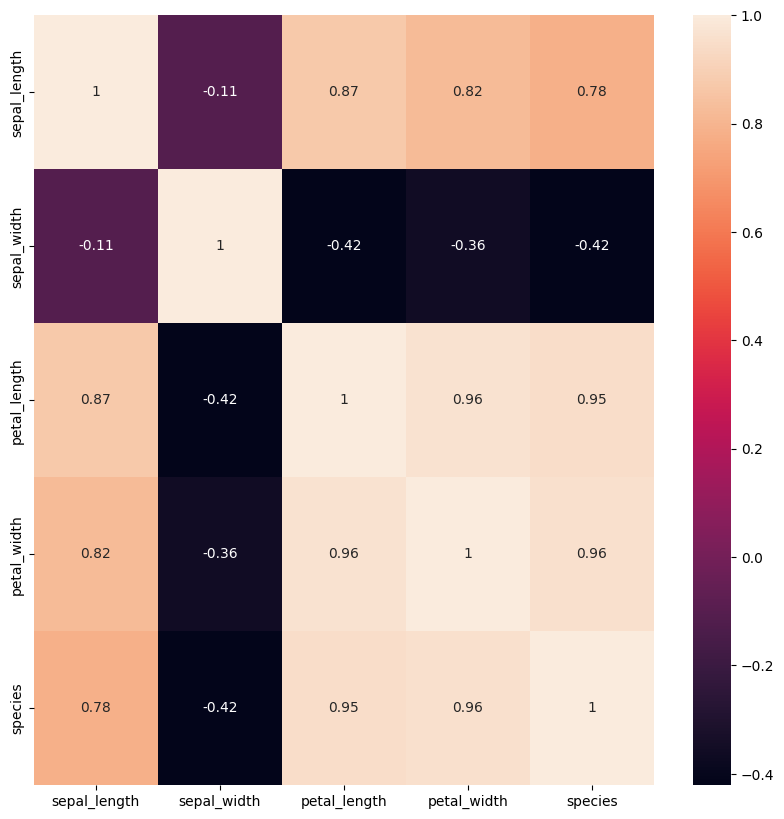

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [87]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


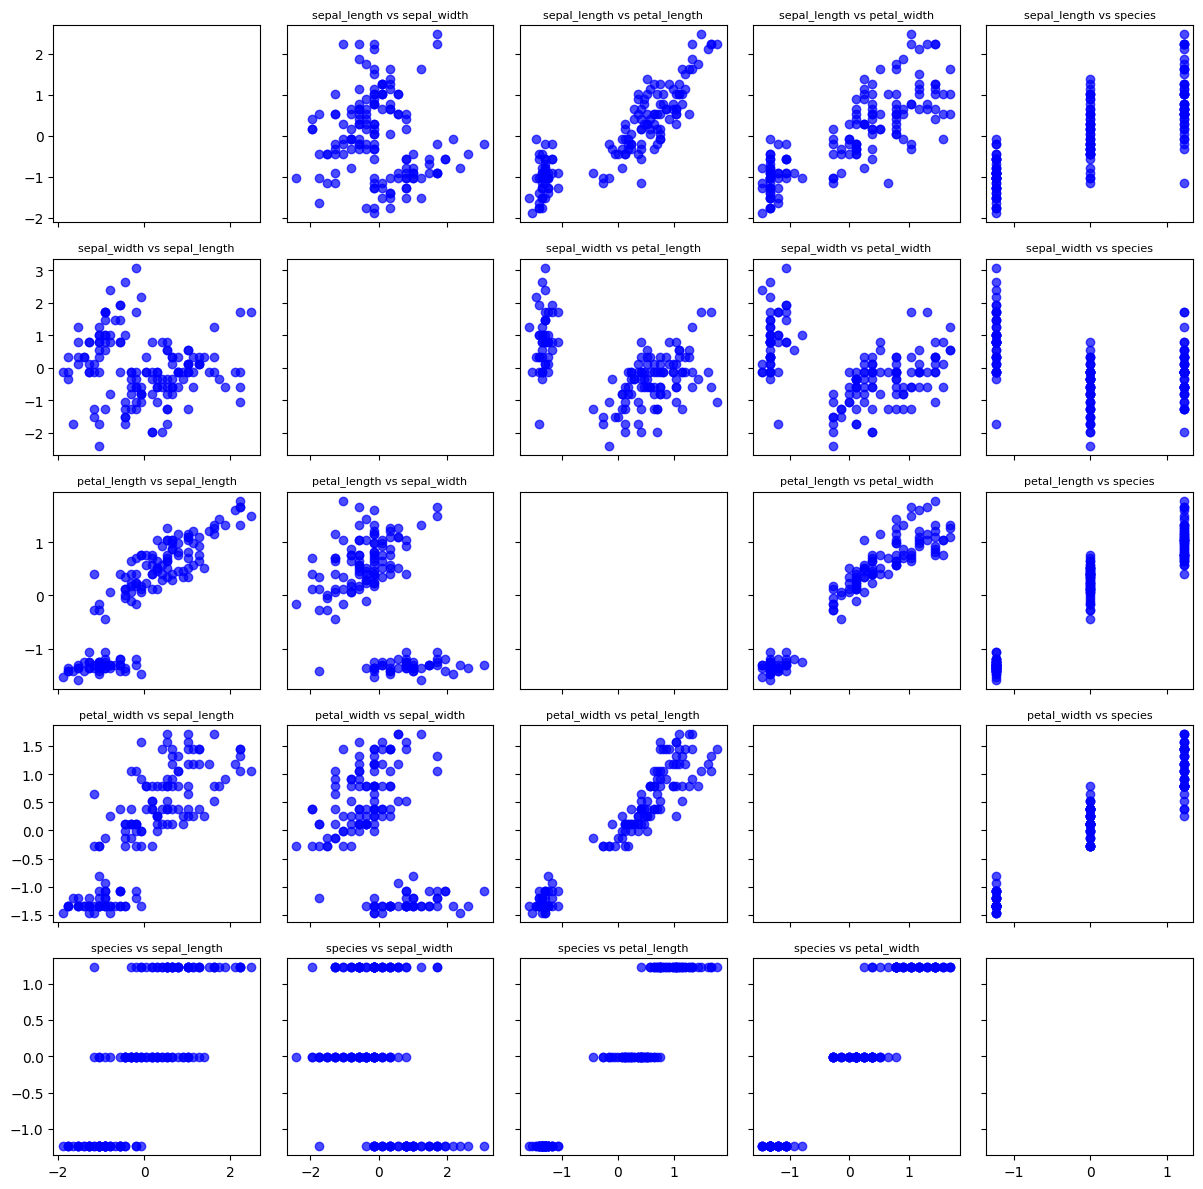

In [88]:
features=df.corr().columns
n_features = len(df.corr().columns)
fig, axes = plt.subplots(n_features, n_features, figsize=(12, 12), sharex='col', sharey='row')
for i in range(n_features):
    for j in range(n_features):
      if i!=j:
        axes[i, j].scatter(df[features[j]], df[features[i]], alpha=0.7, color='blue')
        axes[i, j].set_title(f"{features[i]} vs {features[j]}", fontsize=8)
plt.tight_layout()
plt.show()